# Introduction to regression with neural networks in tensorflow

We're going to predict a number using regression with tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2025-07-14 18:12:48.048451: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 18:12:48.056746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752496968.066993   30428 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752496968.069921   30428 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752496968.077738   30428 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0


### Creating data to view and fit

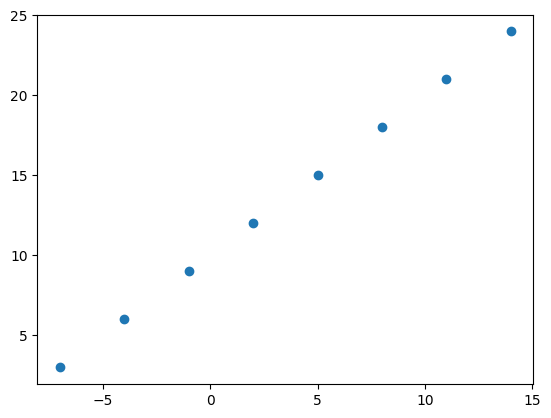

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

I0000 00:00:1752496969.717757   30428 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3953 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [21]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1, 1, 1, 1), dtype=float64, numpy=
 array([[[[[-7.]]]],
 
 
 
        [[[[-4.]]]],
 
 
 
        [[[[-1.]]]],
 
 
 
        [[[[ 2.]]]],
 
 
 
        [[[[ 5.]]]],
 
 
 
        [[[[ 8.]]]],
 
 
 
        [[[[11.]]]],
 
 
 
        [[[[14.]]]]])>,
 <tf.Tensor: shape=(8, 1, 1, 1, 1), dtype=float64, numpy=
 array([[[[[ 3.]]]],
 
 
 
        [[[[ 6.]]]],
 
 
 
        [[[[ 9.]]]],
 
 
 
        [[[[12.]]]],
 
 
 
        [[[[15.]]]],
 
 
 
        [[[[18.]]]],
 
 
 
        [[[[21.]]]],
 
 
 
        [[[[24.]]]]])>)

In [8]:
input_shape = X[0].shape
input_shape

TensorShape([])

## Steps in modelling with TensorFlow

1. Creating a model - define input and output layers, as well as the hidden layers
2. Compiling a model - define the loss function and optimiser
3. Fitting a model - leting a model try to find patterns between X & y (features and labels).

<img src="./steps-in-modelling.png">

In [28]:
# set random seed
tf.random.set_seed(42)

#Fix the data shape - both X and y need to by 2D
X = tf.expand_dims(X,axis=1) #Shape: (8,1)
y = tf.expand_dims(y,axis=1) #Shape: (8,1)

#1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100) 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 8.7740 - mae: 8.7740
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.6415 - mae: 8.6415
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.5090 - mae: 8.5090
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.3765 - mae: 8.3765
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.2440 - mae: 8.2440
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.1115 - mae: 8.1115
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7.9790 - mae: 7.9790
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8465 - mae: 7.8465
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.7140 - mae: 7.7140
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.5815 - mae: 7.5815
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.4490 - mae: 7.4490
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4175 - mae: 7.4175
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st